# GRIP @ The Sparks Foundation
Author: Amireddy.NanduvardhanReddy

Linear Regression with Python Scikit Learn

Task 1: In this regression task to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

Task Title: Predictiion using Supervised ML

Dataset link: http://bit.ly/w-data¶

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
df=pd.read_csv("student_scores - student_scores.csv")

In [145]:
df.head()# TOP 5 ROWS

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [147]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [149]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

THERE ARE NO NULL VALUES

<AxesSubplot:xlabel='Hours'>

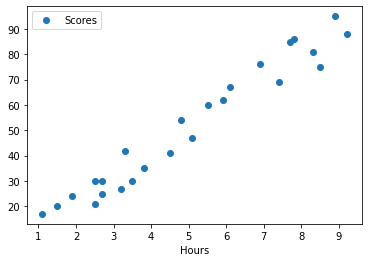

In [150]:
df.plot('Hours','Scores',style='o') # SCATTER PLOT OF HOURS VS SCORES

WE CAN OBSERVE AS SCORES ARE INCREASING HOURS ALSO INCREASING

<AxesSubplot:xlabel='Hours', ylabel='Count'>

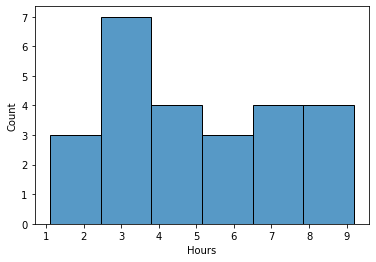

In [47]:
sns.histplot(df['Hours'])

MAXIMUM PEOPLE READ FOR 3 HOURS

<AxesSubplot:xlabel='Scores', ylabel='Count'>

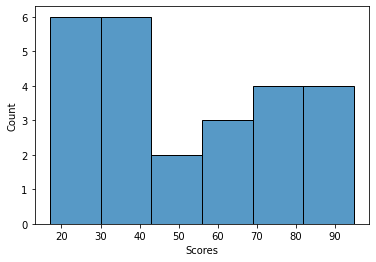

In [48]:
sns.histplot(df['Scores'])

MAXIMUM SCORE ARE 20 & 30. MAXIMUM PEOPLE GETTING LOW SCORES

In [49]:
corr=df.corr()

In [50]:
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

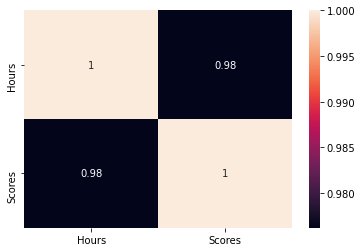

In [51]:
sns.heatmap(corr,annot=True)

THESE ARE HIGHLY CORELATED ON OTHERS 

# PREPARING THE DATA

In [97]:
X=df.drop('Scores',axis=1)

In [98]:
Y=df.drop('Hours',axis=1)

In [100]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [101]:
Y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [105]:
X_train.shape

(20, 1)

In [106]:
X_test.shape

(5, 1)

In [107]:
from sklearn.linear_model import LinearRegression

In [124]:
li= LinearRegression()

In [125]:
li.fit(X_train,Y_train)

LinearRegression()

In [126]:
li.score(X_test,Y_test)

0.9454906892105356

In [127]:
li.coef_

array([[9.91065648]])

In [128]:
li.intercept_

array([2.01816004])

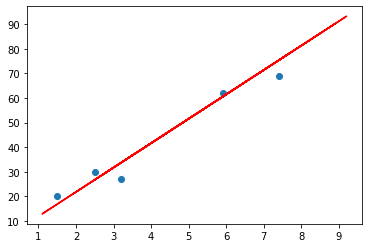

In [129]:
#Plotting the regression line
line = li.coef_*X+li.intercept_

# Plotting for the test data
plt.scatter(X_test, Y_test)
plt.plot(X_train, li.predict(X_train), color="red")
plt.show()

In [130]:
from sklearn.metrics import mean_squared_error

In [131]:
Y_pred=li.predict(X_test)

In [132]:
me=mean_squared_error(Y_test,Y_pred)

In [133]:
print('Mean Squared error is ',me)

Mean Squared error is  21.5987693072174


# COMPARING ACTUAL VS PREDICTED

In [134]:
df = pd.DataFrame(np.c_[X_test,Y_test,Y_pred],columns=["Hours","Original_Scores","Predicted_Scores"])
df

<IPython.core.display.Javascript object>

,Hours,Original_Scores,Predicted_Scores
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


In [137]:
hour=np.array([9.25]).reshape(1,-1)
p=li.predict(hour)
print("Student studies for 9.25 hrs/day")
print("Score of Student = {}".format(p[0]))

<IPython.core.display.Javascript object>

Student studies for 9.25 hrs/day
Score of Student = [93.69173249]


# FINALLY THE SCORE OF A STUDENT CAN GET 93.69 APPROXIMATELY IF HE STUDIED 9.25 HOURS DAILY